In [1]:
import pandas as pd
from catboost import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.core import multiply

In [2]:
!mkdir ../data

mkdir: cannot create directory ‘../data’: File exists


In [36]:

# Load the Titanic dataset
train_data, test_data = datasets.titanic()


In [46]:

titanictrain = pd.DataFrame(train_data)
titanictrain.to_csv('../data/data/titanictrain.csv', index=False)

test_data = pd.DataFrame(test_data)
test_data.to_csv('../data/data/titanictest.csv', index=False)


In [47]:
titanictrain = pd.read_csv('../data/data/titanictrain.csv')
test_data = pd.read_csv('../data/data/titanictest.csv')

In [ ]:
# EDA

In [40]:
titanictrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Display the first few rows of the dataset
print(titanictrain.head())

# Get information about the dataset
print(titanictrain.info())

# Summary statistics
print(titanictrain.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [8]:
# missings

# Check for missing values
missing_values = titanictrain.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


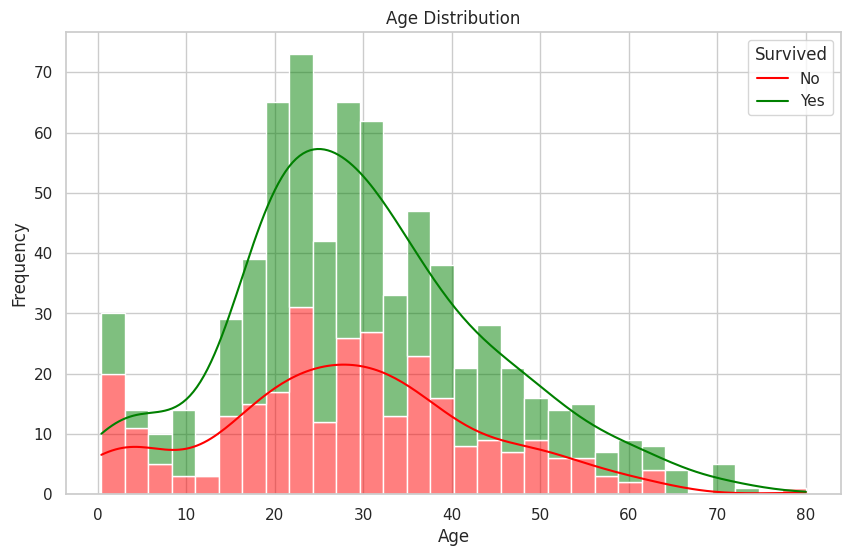

In [30]:
# Vis distr


sns.set(style='whitegrid')

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain[['Age', 'Survived']],
             x='Age',
             bins=30,
             kde=True,
             hue='Survived',
             multiple="stack",
             palette={0: "green", 1: "red"})
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


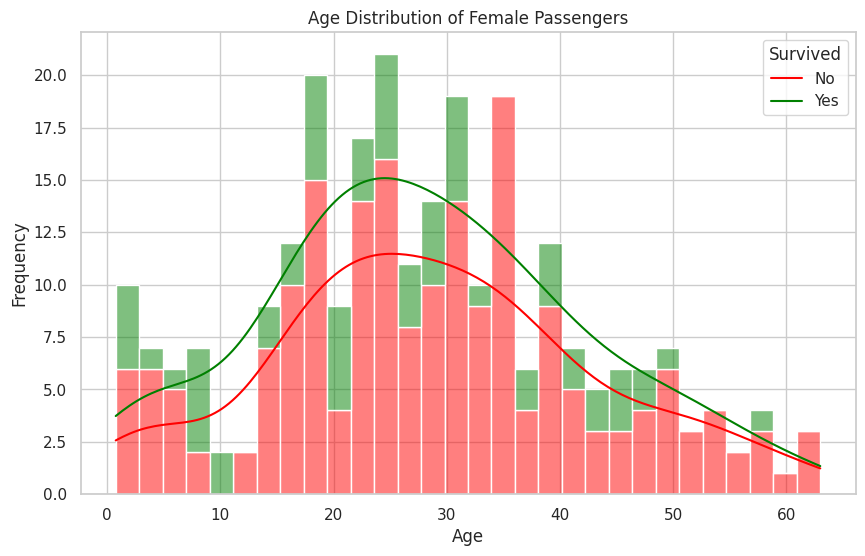

In [38]:

# Plot distribution of female passengers
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain[titanictrain['Sex'] == 'female'][['Age', 'Survived']],
             x='Age',
             bins=30,
             kde=True,
             multiple="stack",
             hue='Survived',
             palette={0: "green", 1: "red"})
plt.title('Age Distribution of Female Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



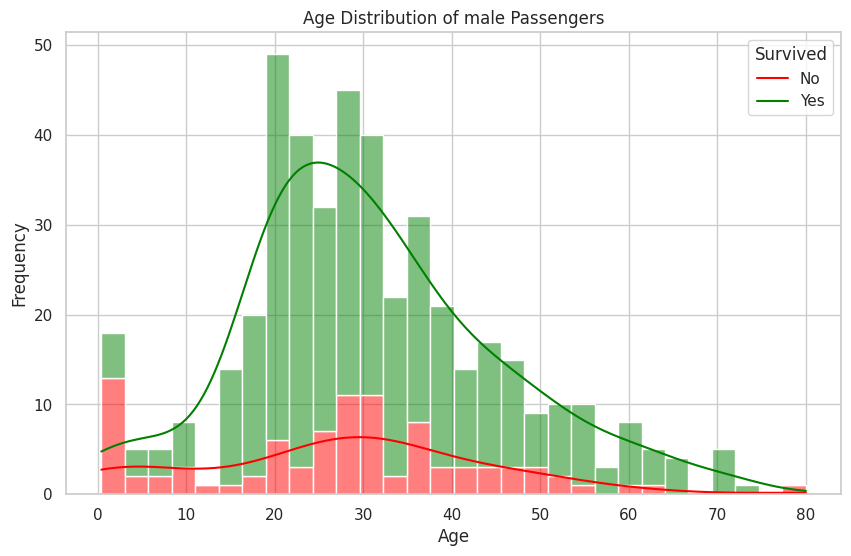

In [41]:

# Plot distribution of male passengers
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain[titanictrain['Sex'] == 'male'][['Age', 'Survived']],
             x='Age',
             bins=30,
             kde=True,
             multiple="stack",
             hue='Survived',
             palette={0: "green", 1: "red"})
plt.title('Age Distribution of male Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



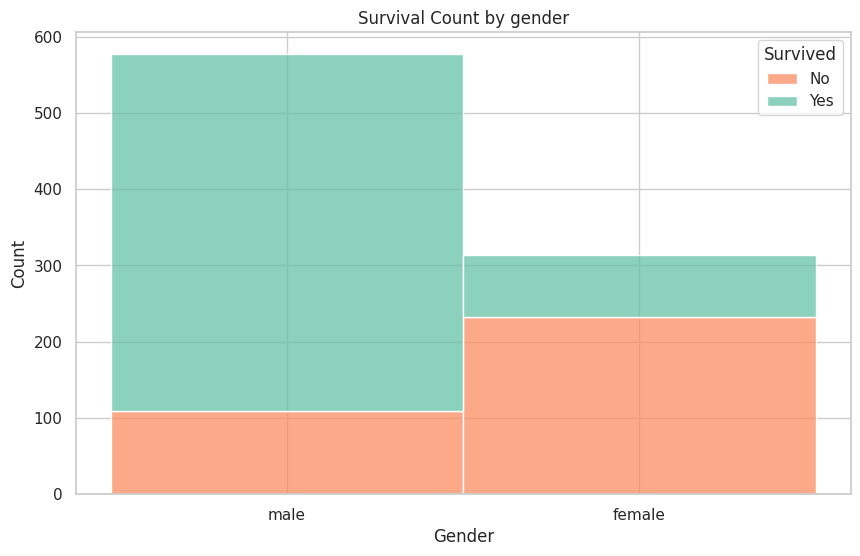

In [67]:

# Survival count
# Plot survival count by sibsp
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain, x='Sex', hue='Survived', multiple='stack', bins=10, kde=False, palette='Set2')
plt.title('Survival Count by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

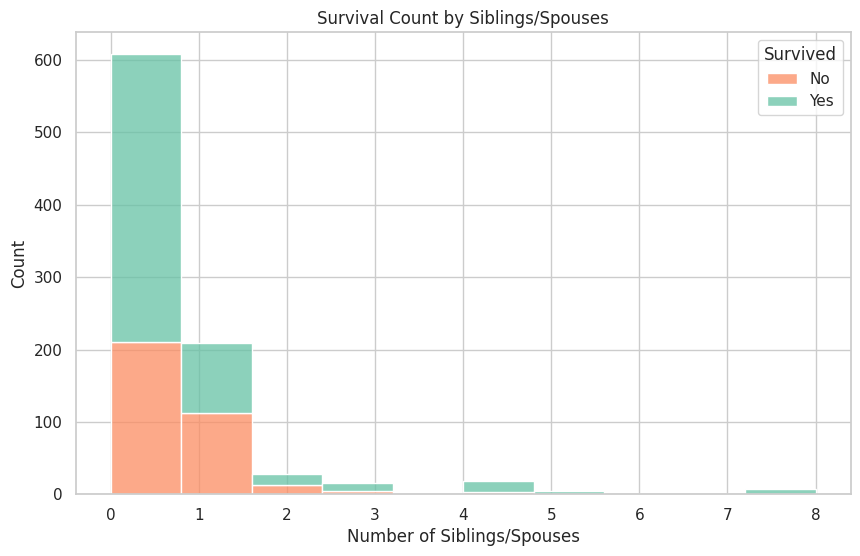

In [66]:

# Survival count
# Plot survival count by sibsp
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain, x='SibSp', hue='Survived', multiple='stack', bins=10, kde=False, palette='Set2')
plt.title('Survival Count by Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

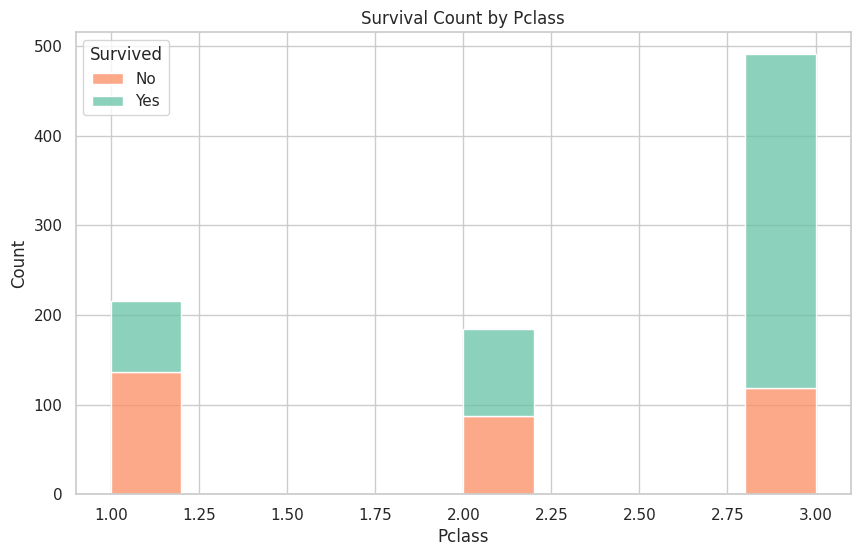

In [68]:

# Survival count
# Plot survival count by 'Pclass'
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain, x='Pclass', hue='Survived', multiple='stack', bins=10, kde=False, palette='Set2')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

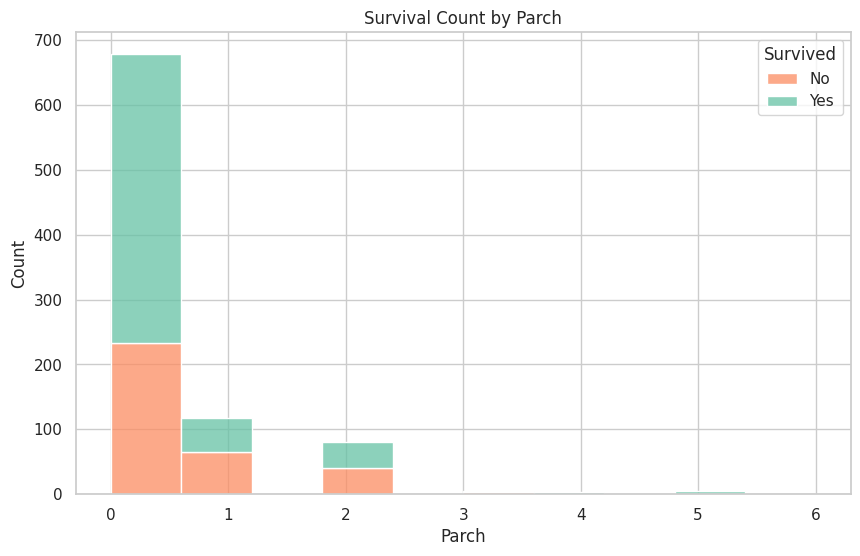

In [69]:

# Survival count
# Plot survival count by parch
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain, x='Parch', hue='Survived', multiple='stack', bins=10, kde=False, palette='Set2')
plt.title('Survival Count by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

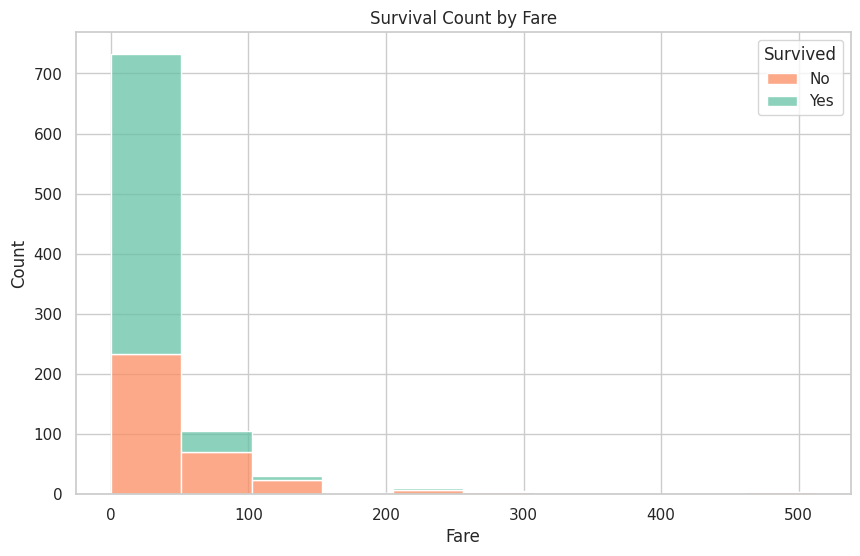

In [70]:

# Survival count
# Plot survival count by fare
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain, x='Fare', hue='Survived', multiple='stack', bins=10, kde=False, palette='Set2')
plt.title('Survival Count by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:

# Survival count
# Plot survival count by Cabine
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain, x='Fare', hue='Survived', multiple='stack', bins=10, kde=False, palette='Set2')
plt.title('Survival Count by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

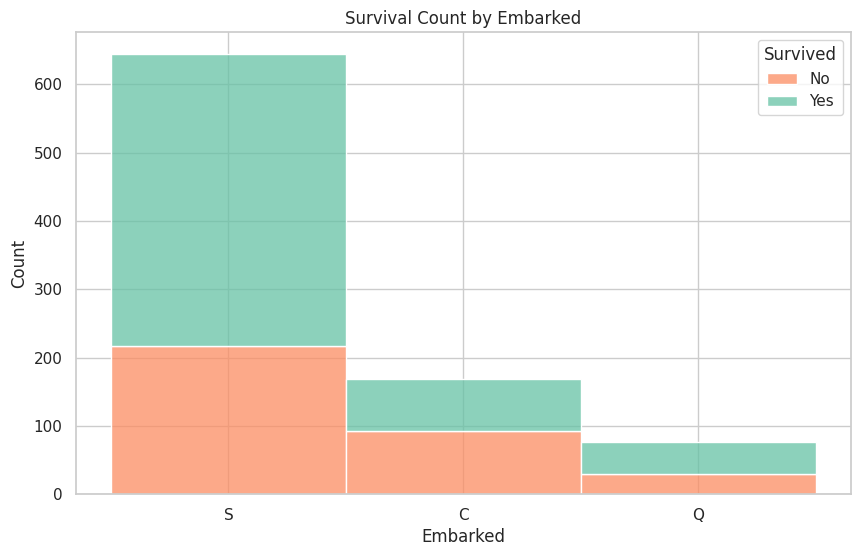

In [72]:

# Survival count
# Plot survival count by Embarked
plt.figure(figsize=(10, 6))
sns.histplot(data=titanictrain, x='Embarked', hue='Survived', multiple='stack', bins=10, kde=False, palette='Set2')
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [74]:
feature_lst = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
sns.heatmap(titanictrain[feature_lst].corr())

ValueError: could not convert string to float: 'male'

In [58]:
titanictrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## data preparation:


In [69]:
titanictrain = pd.read_csv('../data/data/titanictrain.csv')
test_data = pd.read_csv('../data/data/titanictest.csv')

In [70]:
import pandas as pd

class DataPrep():
    """ Data preparation class """
    def __init__(self, df):
        self.df = df

    def _missing_data_impute(self):
        """ Impute missing values """

        # Fill missing Age values with the median
        self.df['Age'].fillna(self.df['Age'].median(), inplace=True)

        # Fill missing Embarked values with the mode
        self.df['Embarked'].fillna(self.df['Embarked'].mode(), inplace=True)

        # Drop Cabin column due to high number of missing values
        if 'Cabin' in self.df.columns:
            self.df.drop(columns=['Cabin'], inplace=True)

        return self.df

    def feature_encoding(self):
        """ Encode categorical features """

        # Encode Sex: male = 0, female = 1
        self.df['Sex'] = self.df['Sex'].map({'male': 0, 'female': 1})

        # Map Embarked: S = 0, C = 1, Q = 2
        self.df['Embarked'] = self.df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

        return self.df

    def one_hot_encoding(self):
        """ One-hot encode categorical features """

        self.df = pd.get_dummies(self.df, columns=['Embarked'], drop_first=True)

        return self.df

    def drop_unnecessary_columns(self):
        """ Drop columns that are not useful for classification """

        columns_to_drop = ['PassengerId', 'Name', 'Ticket']
        self.df.drop(columns=columns_to_drop, inplace=True)

        return self.df

    def prepare_data(self):
        """ Prepare the data by calling all preprocessing methods """
        self._missing_data_impute()
        self.feature_encoding()
        self.one_hot_encoding()
        self.drop_unnecessary_columns()

        return self.df


In [71]:
# make pipeline of data prep
titanictrain_prprd = DataPrep(titanictrain).prepare_data()
titanictest_prprd = DataPrep(test_data).prepare_data()
full = pd.concat([titanictrain_prprd, titanictest_prprd])
print(len(titanictrain_prprd), len(titanictest_prprd), len(full))

891 418 1309


/tmp/ipykernel_974127/2920878617.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df['Age'].fillna(self.df['Age'].median(), inplace=True)
/tmp/ipykernel_974127/2920878617.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [89]:
titanictrain_prprd.to_csv('../data/data/titanictrain_clnd.csv', index=False)
titanictest_prprd.to_csv('../data/data/titanictest_clnd.csv', index=False)


# Modelling

In [79]:
from sklearn.model_selection import train_test_split

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
features = ['Sex', 'Age']

X = titanictrain[features]  # Features for classification
y = titanictrain['Survived']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
331,1,0,45.5,0,0,28.5000
733,2,0,23.0,0,0,13.0000
382,3,0,32.0,0,0,7.9250
704,3,0,26.0,1,0,7.8542
813,3,1,6.0,4,2,31.2750
...,...,...,...,...,...,...
106,3,1,21.0,0,0,7.6500
270,1,0,28.0,0,0,31.0000
860,3,0,41.0,2,0,14.1083
435,1,1,14.0,1,2,120.0000


In [80]:
from sklearn.linear_model import LogisticRegression


# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2%}')

Accuracy of the model: 78.21%


In [82]:
X_test

,Sex,Age
709,0,28.0
439,0,31.0
840,0,20.0
720,1,6.0
39,1,14.0
...,...,...
433,0,17.0
773,0,28.0
25,1,38.0
84,1,17.0


# api

In [88]:
from fastapi import FastAPI
import uvicorn

In [ ]:
app = FastAPI()

@app.post("/predict/")
